In [1]:
# 3.1 Download the provided Pima.csv data file and load it using pandas. As a sanity check, make sure there are 768 rows 
# of data (potential diabetes patients) and 9 columns (8 input features including Pregnancies, Glucose, BloodPressure,
# SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age, and 1 target output). Note that the data file has no 
# header and you might want to explicitly create the header. The last value in each row contains the target label 
# for that row, and the remaining values are the features. Report the statistics of each feature 
# (min, max, average, standard deviation) and the histogram of the labels (target outputs) (5pt).

import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)


df = pd.read_csv("Pima.csv", header=None)
df.columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Class"]
df.shape

(768, 9)

In [2]:
# Report the statistics of each feature

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


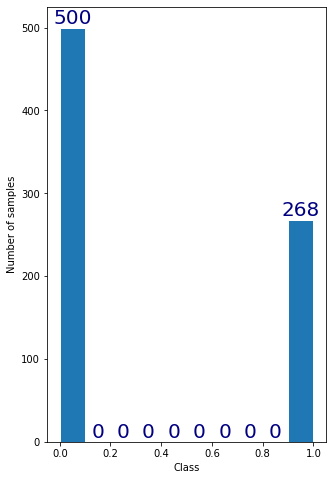

In [3]:
# Create histogram of the labels (target outputs)

plt.figure(figsize=(5, 8))
values, bins, bars = plt.hist(df["Class"], edgecolor='white')
plt.xlabel("Class")
plt.ylabel("Number of samples")
plt.title = ('Class distribution')
plt.bar_label(bars, fontsize=20, color='navy')
plt.show()

In [4]:
# 3.2 Split the data into training and test sets with 80% training and 20% test data sizes.
# Use 5-fold cross-validation on training data to decide the best number of neighbours k.

y = df.pop('Class')
X = df
np.random.seed(18)
X_train,X_test,y_train,y_test = train_test_split(X.index,y,test_size=0.2)

In [5]:
# For k = 1, 2, 3, . . . , 15 compute the 5-fold cross validation error and plot the results
warnings.filterwarnings('ignore', category=DeprecationWarning)

cv = KFold(n_splits=5, random_state=1)
mean_error = []
std_error = []
for k in range(1,16):
    # create model
    model = KNeighborsClassifier(n_neighbors=k)
    # evaluate model - By default the number of folds are 5.
    scores = cross_val_score(model, X.iloc[X_train], y.iloc[y_train])
    mean_error.append(np.mean(scores))
    std_error.append(np.std(scores))
    print('Accuracy: %.3f (%.3f) K:' % (np.mean(scores), np.std(scores)),k)

/Users/akarshbolar/opt/anaconda3/envs/cs529/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/akarshbolar/opt/anaconda3/envs/cs529/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/akarshbolar/opt/anaconda3/envs/cs529/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/Users/akarshbolar/opt/anaconda3/envs/cs529/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv wil

Accuracy: 0.681 (0.016) K: 1
Accuracy: 0.661 (0.009) K: 2
Accuracy: 0.710 (0.013) K: 3
Accuracy: 0.704 (0.026) K: 4
Accuracy: 0.728 (0.045) K: 5
Accuracy: 0.717 (0.050) K: 6
Accuracy: 0.743 (0.046) K: 7
Accuracy: 0.739 (0.048) K: 8
Accuracy: 0.749 (0.044) K: 9
Accuracy: 0.744 (0.050) K: 10
Accuracy: 0.738 (0.045) K: 11
Accuracy: 0.741 (0.055) K: 12
Accuracy: 0.744 (0.046) K: 13
Accuracy: 0.730 (0.042) K: 14
Accuracy: 0.735 (0.042) K: 15


/Users/akarshbolar/opt/anaconda3/envs/cs529/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


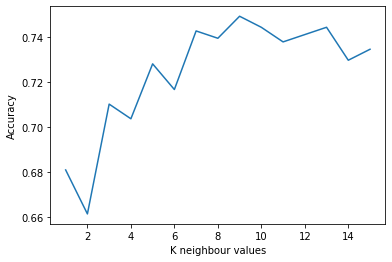

In [6]:
# Include the plot in your report and justify your decision for picking a particular number of neighbors k

plt.xlabel("K neighbour values")
plt.ylabel("Accuracy")
plt.title = ('Error Rate')
plt.plot([x for x in range(1,16)], mean_error)

For justification as to what is the k value to choose, looking at the graph, we see that K=9 has maximum accuracy of 75.6.  Hence, k = 9, would be the best choice for k.


In [7]:
# 3.3 Evaluate the k-NN algorithm on test data with the optimal number of neighbours you obtained in previous step 
# and report the test error (you will use the same value of k you have found in 2.) 

k=9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X.iloc[X_train],y.iloc[y_train])
yhat = knn.predict(X.iloc[X_test])
print("Test Accuracy",knn.score(X.iloc[X_test],y.iloc[y_test])*100,"%")
print("Test Error:",100-knn.score(X.iloc[X_test],y.iloc[y_test])*100,"%")

Test Accuracy 74.02597402597402 %
Test Error: 25.974025974025977 %


In [8]:
# 3.4 Process the input data by subtracting the mean (a.k.a. centralization) and dividing by the standard deviation
# (a.k.a. standardization) over each dimension (feature), repeat the previous part and report the accuracy (5pt). 
# Do centralization and standardization impact the accuracy? Why?

X_centered = (X - X.mean(axis=0))/X.std(axis=0)

X_train,X_test,y_train,y_test = train_test_split(X_centered.index,y,test_size=0.2)
k=9
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_centered.iloc[X_train],y.iloc[y_train])
yhat = knn.predict(X_centered.iloc[X_test])
print("Test Accuracy",knn.score(X_centered.iloc[X_test],y.iloc[y_test])*100,"%")
print("Test Error:",100-knn.score(X_centered.iloc[X_test],y.iloc[y_test])*100,"%")

Test Accuracy 77.27272727272727 %
Test Error: 22.727272727272734 %


3.4 Centralization and standardization has no impact since sometimes normalizing data removes important feature differences therefore causing accuracy to go down. Other times, it helps to eliminate noise in your features which cause incorrect classifications. Instead of trying to label normalization as good/bad, consider the feature inputs you are using for classification, determine which ones are important to your model, and make sure differences in those features are reflected accurately in your classification model

In [9]:
# Perform 2 and 3 for part 4 - IMPORTANTTTTTT